In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
#!cp 'path/to/file' 'path/to/drive'

In [9]:
import os
os.chdir("drive/My Drive/exercise_DL_pcg")

In [10]:
!ls

all_levels_onehot.npz		   __pycache__	     train_vae.py
example_sampling_random_levels.py  readme.md	     vae_mario.py
models				   requirements.txt
plotting_utilities.py		   sprites


In [11]:
import os
import torch
import matplotlib.pyplot as plt

from vae_mario import VAEMario
from plotting_utilities import plot_decoded_level

In [12]:
# Loading the model
model_name = "mario_vae_zdim_2_overfitted"
z_dim = 2
vae = VAEMario(z_dim=z_dim)
vae.load_state_dict(torch.load(f"./models/{model_name}.pt"))


VAEMario(
  (encoder): Sequential(
    (0): Linear(in_features=2156, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
  )
  (fc_mu): Sequential(
    (0): Linear(in_features=256, out_features=2, bias=True)
  )
  (fc_var): Sequential(
    (0): Linear(in_features=256, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=2156, bias=True)
  )
)


<All keys matched successfully>

In [13]:
# Sampling random zs
zs = 2.5 * torch.randn((4, z_dim))

In [14]:
# Getting levels from them using the decoder
levels = vae.decode(zs)
# print(levels.shape)
level_imgs = [plot_decoded_level(level) for level in levels]


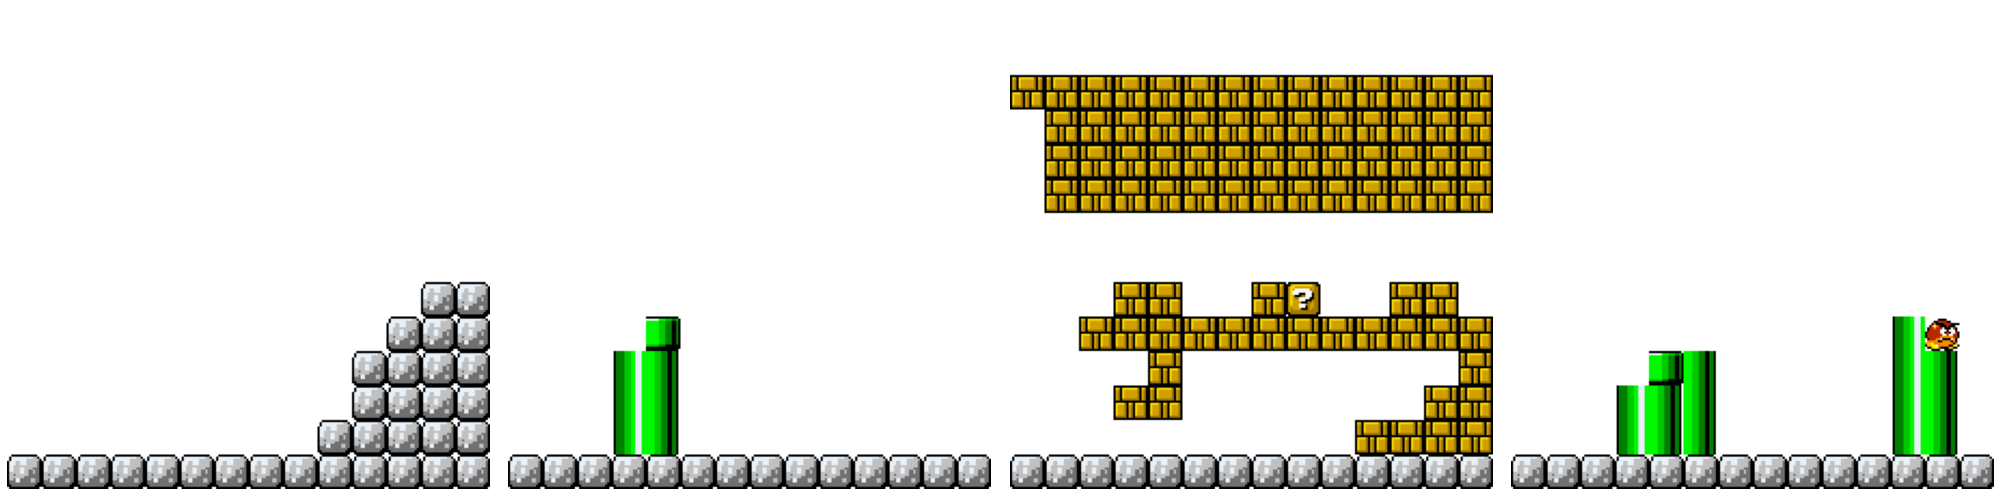

In [15]:
# Plotting
_, axes = plt.subplots(1, 4, figsize=(7 * 4, 7))
for level_img, ax in zip(level_imgs, axes):
    ax.imshow(level_img)
    ax.axis("off")

plt.tight_layout()
plt.show()


# Latent Variable Evolution Lab


## Sample from the VAE and then implement some search algorithm of choise to search the latent space for a particular level (e.g. one with many ground tiles)



# notes 

* every z is a specific level
*   notian of localy = small change 
*   serach for a layout
* init z to something andom
  * need to evel levels MSC 
  * have z, add variations
  * compare to target
*have some target t (a specific layout)

nbr of correct tiles  tensor(196)


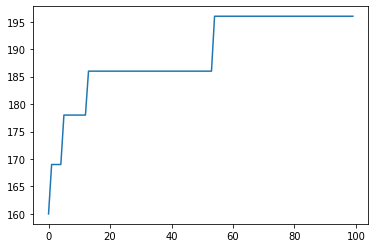

In [41]:
import numpy as np
import random

levels = vae.decode(zs)
level_1 = levels[0]   # 1st dimension is a probability of the tile
target = torch.argmax(level_1,dim=0)

prev = 0
mul = random.randrange(-10,10)
variations = 4
itr = 100

best_level = None
best_value = torch.tensor(0)

def eval(new_levels,target_level):
  evel_best_level = None
  evel_best = torch.tensor(0)

  for level in new_levels:
    level = torch.argmax(level,dim=0)
    tmp = (level == target_level).int()
    new_sum = torch.sum(tmp)

    if new_sum > evel_best:
      evel_best_level = level
      evel_best = new_sum
  return evel_best_level,evel_best

def makeNoise(mul,variations):
  return mul * torch.randn((variations, z_dim))

ys = []

for x in range(itr):
  rand_torch = makeNoise(mul,variations)
  start = vae.decode(rand_torch)
  new_level,eval_value = eval(start,target)

  if eval_value > best_value: 
    best_value = eval_value
    best_level = new_level
    mul +=0.1
  else:
    mul = random.randrange(-10,10)
  ys.append(best_value)

#print("Target",target)
#print("Best itr",best_level)

#print("Diff ",(target==best_level).int())
#print("Sum ",torch.sum((target==best_level).int()))
# 14x14 = 196
plt.plot(ys)
print("nbr of correct tiles ",best_value)
